![1846257331](1846257331.jpg)


# Predicting Christmas Movie Grossings

## 📖 Background

Imagine harnessing the power of data science to unveil the hidden potential of movies before they even hit the silver screen! As a data scientist at a forward-thinking cinema, you're at the forefront of an exhilarating challenge: crafting a cutting-edge system that doesn't just predict movie revenues, but reshapes the entire landscape of cinema profitability. This isn't just about numbers; it's about blending art with analytics to revolutionize how movies are marketed, chosen, and celebrated.

Your mission? To architect a predictive model that dives deep into the essence of a movie - from its title and running time to its genre, captivating description, and star-studded cast. And what better way to sprinkle some festive magic on this project than by focusing on a dataset brimming with Christmas movies? A highly-anticipated Christmas movie is due to launch soon, but the cinema has some doubts. It wants you to predict its success, so it can decide whether to go ahead with the screening or not. It's a unique opportunity to blend the cheer of the holiday season with the rigor of data science, creating insights that could guide the success of tomorrow's blockbusters. Ready to embark on this cinematic adventure?



## 💾 The data

We're providing you with a dataset of 788 Christmas movies, with the following columns:

* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

You may also use an additional dataset of 1000 high-rated movies, with the following columns:

* `imdb_top1k.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the ratig/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

Finally you have access to a dataset of movie production budgets for over 6,000 movies, with the following columns:

* `movie_budgets.csv`

| Variable            | Meaning                         |
|---------------------|---------------------------------|
| `year`              | year the movie was released     |
| `date`              | date the movie was released     |
| `title`             | title of the movie              |
| `production budget` | production budget in US dollars |


**Note: while you may augment the Christmas movies with the general movie data, the model should be developed to predict ratings of Christmas movies only.**

In [1]:
#This command installs the latest version of the XGBoost library, which is a popular and efficient open-source machine learning library specifically designed for gradient boosting.

!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
#This command installs the Altair Viewer, an extension for the Altair library that provides an interactive viewer for Altair visualizations in Jupyter Notebooks.

!pip install altair_viewer

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 75.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
#This command upgrades your existing PyArrow installation to the latest version available. Upgrading is useful to access new features, improvements, and bug fixes introduced in newer releases of the library.

!pip install --upgrade pyarrow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 46.1 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awswrangler 2.16.1 requires pyarrow<7.1.0,>=2.0.0, but you have pyarrow 14.0.2 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
#This command installs the Prince library, which is a Python implementation of multiple factor analysis (MFA) and other dimensionality reduction techniques for mixed-type data.

!pip install prince

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 34.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [91]:
# Import necessary libraries for data manipulation, visualization, and machine learning preprocessing
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
from matplotlib import gridspec  # Gridspec for customized subplot layouts
import seaborn as sns  # Seaborn for statistical data visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # WordCloud for generating word clouds
from PIL import Image  # Pillow library for working with images
from sklearn.impute import KNNImputer  # KNNImputer for imputing missing values using k-Nearest Neighbors
from sklearn.preprocessing import StandardScaler  # StandardScaler for standardizing features in machine learning
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear Regression model for predictive modeling
from sklearn.metrics import mean_squared_error  # Mean Squared Error for model evaluation
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for encoding categorical variables
# Import the Principal Component Analysis (PCA) class from scikit-learn
from sklearn.decomposition import PCA
# Import the Multiple Correspondence Analysis (MCA) class from the prince library
from prince import MCA
# Import the Altair library for interactive visualizations
import altair as alt
# Import the prince library for multivariate analysis
import prince

from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor for predictive modeling
from xgboost import XGBRegressor  # XGBoost Regressor for predictive modeling
from sklearn.tree import plot_tree  # plot_tree for visualizing decision trees
import statsmodels.api as sm  # Statsmodels for statistical analysis

# Import the Pipeline class from scikit-learn for constructing a machine learning pipeline
from sklearn.pipeline import Pipeline

# Import the ColumnTransformer class for applying different transformations to different subsets of columns
from sklearn.compose import ColumnTransformer

# Import StandardScaler for scaling numerical features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler

# Import OneHotEncoder for one-hot encoding categorical features
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import r2_score and mean_squared_error for evaluating regression model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import SimpleImputer for handling missing values in the dataset
from sklearn.impute import SimpleImputer

# Import necessary libraries
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [6]:

xmas_movies = pd.read_csv('data/christmas_movies.csv')
xmas_movies

title  ...     gross
0                                        Love Actually  ...   $59.70M
1                National Lampoon's Christmas Vacation  ...   $71.32M
2                                             Spirited  ...       NaN
3                                           Home Alone  ...  $285.76M
4                       How the Grinch Stole Christmas  ...  $260.04M
..                                                 ...  ...       ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...       NaN
784                   Cosmic Cowboys: Céréal Christmas  ...       NaN
785  Proper Manors: Christmas Special: Christmas Pa...  ...       NaN
786  Being Millennialish: A Very Millennial Christm...  ...       NaN
787      Sacred Music at Christmas: A Choral Christmas  ...       NaN

[788 rows x 11 columns]

In [7]:
top1k_movies = pd.read_csv('data/imdb_top1k.csv')
top1k_movies

Series_Title Released_Year  ...           Star4        Gross
0    The Shawshank Redemption          1994  ...  William Sadler   28,341,469
1               The Godfather          1972  ...    Diane Keaton  134,966,411
2             The Dark Knight          2008  ...   Michael Caine  534,858,444
3      The Godfather: Part II          1974  ...    Diane Keaton   57,300,000
4                12 Angry Men          1957  ...    John Fiedler    4,360,000
..                        ...           ...  ...             ...          ...
995    Breakfast at Tiffany's          1961  ...     Buddy Ebsen          NaN
996                     Giant          1956  ...   Carroll Baker          NaN
997     From Here to Eternity          1953  ...      Donna Reed   30,500,000
998                  Lifeboat          1944  ...  William Bendix          NaN
999              The 39 Steps          1935  ...  Godfrey Tearle          NaN

[1000 rows x 14 columns]

In [8]:
movie_budgets = pd.read_csv('data/movie_budgets.csv')
movie_budgets

year  ... production budget
0     2022.0  ...         460000000
1     2019.0  ...         400000000
2     2011.0  ...         379000000
3     2015.0  ...         365000000
4     2023.0  ...         340000000
...      ...  ...               ...
6435  1999.0  ...              6000
6436  2005.0  ...              5000
6437  2015.0  ...              1400
6438  2005.0  ...              1100
6439  2021.0  ...                86

[6440 rows x 4 columns]

## 💪 Competition challenge

Create a report that covers the following:
1. Exploratory data analysis of the dataset with informative plots. It's up to you what to include here! Some ideas could include:
    * Analysis of the genres
    * Descriptive statistics and histograms of the grossings
    * Word clouds
2. Develop a model to predict the movie's domestic gross based on the available features.
     * Remember to preprocess and clean the data first.
     * Think about what features you could define (feature engineering), e.g.:
       * _number of times a director appeared in the top 1000 movies list_,
       * _highest grossing for lead actor(s)_,
       * _decade released_
3. Evaluate your model using appropriate metrics.
4. Explain some of the limitations of the models you have developed. What other data might help improve the model?
5. Use your model to predict the grossing of the following fictitious Christmas movie:

**Title**: The Magic of Bellmonte Lane

**Description**:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:
- Emma Thompson as Emily, a kind-hearted and curious woman
- Ian McKellen as Mr. Grayson, the stern corporate developer
- Tom Hanks as George, the wise and elderly owner of the local cafe
- Zoe Saldana as Sarah, Emily's supportive best friend
- Jacob Tremblay as Timmy, a young boy with a special Christmas wish

**Runtime**: 105 minutes

**Genres**: Family, Fantasy, Romance, Holiday

**Production budget**: $25M



## Executive Summary:

This project, at the intersection of analytics and the film industry, harnessed a multifaceted approach encompassing descriptive, predictive, and prescriptive analytics. Leveraging advanced methodologies, including Principal Component Analysis (PCA), Multiple Correspondence Analysis (MCA), and predictive models like Random Forest and XGBoost, we sought to unravel patterns influencing movie total gross.

**Recommendations**:

**- Holistic Descriptive Analytics**: Augment descriptive analytics to comprehensively capture historical trends, industry patterns, and key performance indicators. Utilize visualization tools to present insights in an accessible manner.

**- Diversification of Predictive Models**: Expand the repertoire of predictive models beyond Random Forest to include advanced algorithms like XGBoost. This diversification enhances the modeling toolkit, accommodating varied data structures and improving predictive accuracy.

**- Prescriptive Analytics Implementation**: Transition towards prescriptive analytics to provide actionable recommendations. Develop strategies that guide decision-making for stakeholders in the film industry, optimizing outcomes based on predictive insights.

**- Advanced Dimensionality Reduction Techniques**: Continue exploration of advanced dimensionality reduction methods, specifically PCA and MCA. Uncover latent structures within the dataset to streamline features and enhance model interpretability.

**- Holistic Model Validation**: Implement rigorous cross-validation techniques to ensure the robustness and generalizability of predictive models. This practice is crucial for validating model performance across diverse datasets and real-world scenarios.

These recommendations collectively aim to fortify the analytical framework, equipping the film industry with more sophisticated tools for decision-making. The integration of these approaches will not only enhance predictive accuracy but also empower stakeholders with actionable insights, fostering a new era of strategic planning and efficiency.

# Conducting exploratory data analysis on the dataset using insightful visualizations.

## Data Exploration through Informative Visualizations: A Comprehensive Analysis of the Dataset

- ###  **Analysis of the genres**

In [9]:
#Displaying the dimensions (shape) of 'top1k_movies', assumed to be a data structure
print(top1k_movies.shape)

(1000, 14)


In [10]:
#Displaying concise information about the structure and data types of 'top1k_movies'
top1k_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  Gross          831 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [11]:
#Counting the number of missing values in each column of 'top1k_movies'.
top1k_movies.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
Gross            169
dtype: int64

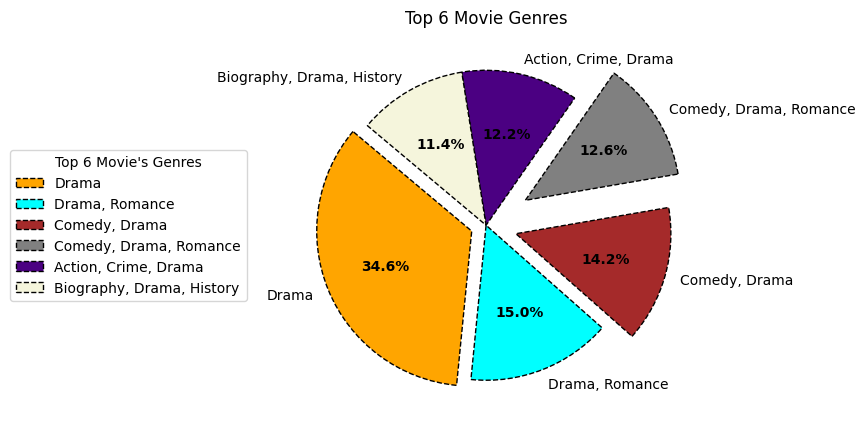

In [12]:
# Extract the top 6 genres from the 'Genre' column of the top1k_movies DataFrame
top_genres = top1k_movies['Genre'].value_counts().nlargest(6)

# Define custom colors for each wedge in the pie chart
colors = ("orange", "cyan", "brown", "grey", "indigo", "beige")

# Define the amount of separation (explode) for each wedge in the pie chart
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# Define properties for the wedges in the pie chart
wp = {'linewidth': 1, 'linestyle': '--', 'edgecolor': 'black'}

# Create a subplot with a specified size using the subplots method
fig, ax = plt.subplots(figsize=(5, 10))

# Create a pie chart with labels, autopct formatting, start angle, custom colors, wedge properties, and explode values
wedges, texts, autotexts = ax.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wp, explode=explode)

# Add a legend to the plot with genre labels and a title
ax.legend(wedges, top_genres.index.tolist(),
          title="Top 6 Movie's Genres",
          bbox_to_anchor=(-0.1, 0.5),
          loc="right")

# Set the size and weight of the autopct text labels to enhance visibility
plt.setp(autotexts, size=10, weight="bold")

# Add a title to the pie chart
plt.title('Top 6 Movie Genres')

# Display the pie chart
plt.show()

In [13]:
#Displaying the dimensions (shape) of 'xmas_movies', assumed to be a data structure
print(xmas_movies.shape)

(788, 11)


In [14]:
#Displaying concise information about the structure and data types of 'xmas_movies'
xmas_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         788 non-null    object 
 1   release_year  780 non-null    float64
 2   description   788 non-null    object 
 3   type          788 non-null    object 
 4   rating        646 non-null    object 
 5   runtime       749 non-null    float64
 6   imdb_rating   749 non-null    float64
 7   genre         787 non-null    object 
 8   director      783 non-null    object 
 9   stars         776 non-null    object 
 10  gross         81 non-null     object 
dtypes: float64(3), object(8)
memory usage: 67.8+ KB


In [15]:
#Counting the number of missing values in each column of 'xmas_movies'.
xmas_movies.isna().sum()

title             0
release_year      8
description       0
type              0
rating          142
runtime          39
imdb_rating      39
genre             1
director          5
stars            12
gross           707
dtype: int64

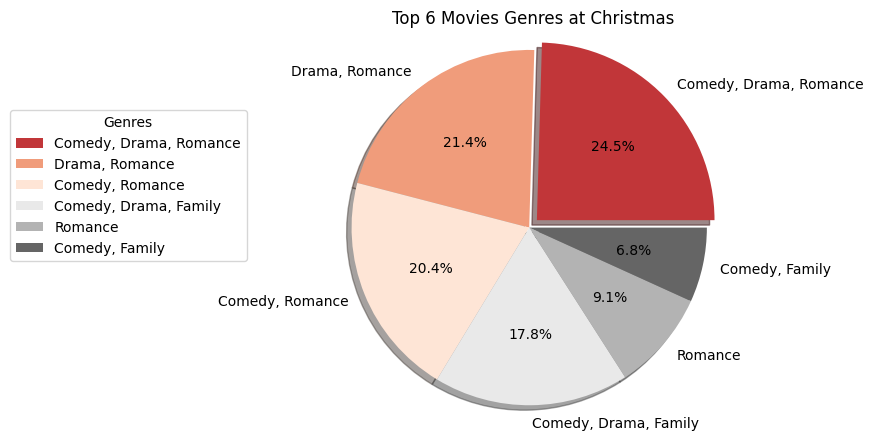

In [16]:
# Extract the top 6 genres from the 'genre' column of the xmas_movies DataFrame
xmas_genres = xmas_movies['genre'].value_counts().nlargest(6)

# Create a figure with a specific size
fig = plt.figure(figsize=(17, 5))

# Define a grid layout with 1 row and 2 columns, specifying height and width ratios
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

# Set the explode values for the first wedge to create a slight separation
explode = [0 for _ in range(6)]
explode[0] = 0.06

# Create a subplot in the second column of the grid layout
ax2 = plt.subplot(gs[1])

# Define a function to format the autopct values with one decimal place
def autopct_format(pct):
    return '{:.1f}%'.format(pct)

# Create a pie chart with labels, shadows, start angle, explode values, custom colors, and autopct formatting
wedges, texts, autotexts = ax2.pie(xmas_genres, labels=xmas_genres.index,
                                   shadow=True, startangle=0, explode=explode,
                                   colors=sns.color_palette("RdGy", n_colors=6),
                                   autopct=autopct_format)

# Set the aspect ratio of the pie chart to be equal
ax2.axis('equal') 

# Set the text color of autopct labels to black for better visibility
for autotext in autotexts:
    autotext.set_color('black')

# Add a legend to the subplot with genre labels
ax2.legend(xmas_genres.index, title="Genres", loc="right", bbox_to_anchor=(-0.2, 0.6))

# Add a title to the plot
plt.title('Top 6 Movies Genres at Christmas')

# Display the plot
plt.show()

The comparison of the two pie charts reveals interesting insights into movie genre preferences, with a notable shift during the The comparison of the two pie charts reveals interesting insights into movie genre preferences, with a notable shift during the Christmas season. While "Drama" maintains its dominance in the overall dataset at 34.6%, the Christmas-specific chart showcases a preference for more lighthearted and romantic genres.

For a content strategy targeting the broader audience, it is crucial to acknowledge the enduring popularity of dramatic content. However, during festive periods like Christmas, there's a distinct opportunity to capitalize on the audience's inclination towards genres that evoke warmth and joy.

**Key Observations**:

Drama-Romance emerges as a strong contender in both charts, signifying a consistent appeal across different contexts.
Comedy-Drama-Romance sees a significant surge during Christmas, indicating that audiences lean towards heartwarming and entertaining narratives during the holiday season.
Comedy-Drama and Drama-Romance maintain their positions in both charts, showcasing their versatility and enduring popularity.

**Recommendation for Content Strategy**:

Considering the observed trends, a balanced content strategy could involve creating and promoting a mix of genres. Regularly offering engaging dramas for a steady audience base is essential, while during festive seasons, an emphasis on heartwarming Comedy-Drama-Romance content could resonate well with viewers seeking a more celebratory and joyful viewing experience.

Incorporating these insights into content planning ensures a nuanced approach that caters to audience preferences across different times of the year, maximizing the appeal and reach of the content portfolio.

-  ### **Descriptive statistics and histograms of the grossings**

In [17]:
# Convert 'gross' column to string type, replace characters, and convert to numeric
xmas_movies['gross'] = xmas_movies['gross'].astype(str).str.replace('[\$,M]', '', regex=True).astype(float) * 1000000

# Format the 'gross' column with commas
xmas_movies['gross'] = xmas_movies['gross'].map('{:,.0f}'.format)

# Now 'gross' contains numeric values without commas
print(xmas_movies['gross'].head(20))

# Remove commas from the 'gross' column
xmas_movies['gross'] = xmas_movies['gross'].str.replace(',', '')

# Convert 'gross' column to numeric type
# 'coerce' will replace any non-numeric values with NaN
xmas_movies['gross'] = pd.to_numeric(xmas_movies['gross'], errors='coerce')

# Now, 'gross' contains numeric values
print(xmas_movies)

0      59,700,000
1      71,320,000
2             nan
3     285,760,000
4     260,040,000
5     173,400,000
6      12,200,000
7      30,000,000
8      83,010,000
9     270,620,000
10    173,590,000
11    183,370,000
12    144,830,000
13     60,330,000
14            nan
15     17,190,000
16     35,150,000
17    137,860,000
18    139,240,000
19      2,650,000
Name: gross, dtype: object
                                                 title  ...        gross
0                                        Love Actually  ...   59700000.0
1                National Lampoon's Christmas Vacation  ...   71320000.0
2                                             Spirited  ...          NaN
3                                           Home Alone  ...  285760000.0
4                       How the Grinch Stole Christmas  ...  260040000.0
..                                                 ...  ...          ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...          NaN
784                   Cosmic 

In [18]:
# Extract numeric columns for imputation
numeric_columns = xmas_movies.select_dtypes(include='number').columns

# Create a KNNImputer object with k=5 (you can adjust k as needed).
imputer = KNNImputer(n_neighbors=5)

# Impute NaN values in the numeric columns using KNNImputer.
xmas_movies[numeric_columns] = imputer.fit_transform(xmas_movies[numeric_columns])

# Print the DataFrame after imputing NaN values with KNN.
print("\nDataFrame after imputing NaN values with KNN:")
print(xmas_movies)
print(numeric_columns)


DataFrame after imputing NaN values with KNN:
                                                 title  ...        gross
0                                        Love Actually  ...   59700000.0
1                National Lampoon's Christmas Vacation  ...   71320000.0
2                                             Spirited  ...  159074000.0
3                                           Home Alone  ...  285760000.0
4                       How the Grinch Stole Christmas  ...  260040000.0
..                                                 ...  ...          ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...  150014000.0
784                   Cosmic Cowboys: Céréal Christmas  ...   94258000.0
785  Proper Manors: Christmas Special: Christmas Pa...  ...   73918000.0
786  Being Millennialish: A Very Millennial Christm...  ...  150992000.0
787      Sacred Music at Christmas: A Choral Christmas  ...  152090000.0

[788 rows x 11 columns]
Index(['release_year', 'runtime', 'imdb_rating', 'gr

In [19]:
#Generating descriptive statistics for the 'xmas_movies' dataset.
xmas_movies.describe()

release_year     runtime  imdb_rating         gross
count    788.000000  788.000000   788.000000  7.880000e+02
mean    2008.197970   86.441928     6.122351  6.600043e+07
std       20.411191   19.113870     0.959577  3.468234e+07
min     1898.000000    1.000000     1.300000  1.000000e+04
25%     2008.000000   84.000000     5.600000  5.356450e+07
50%     2016.000000   87.000000     6.200000  6.524400e+07
75%     2019.000000   92.850000     6.600000  8.299500e+07
max     2023.000000  199.000000     9.200000  4.090100e+08

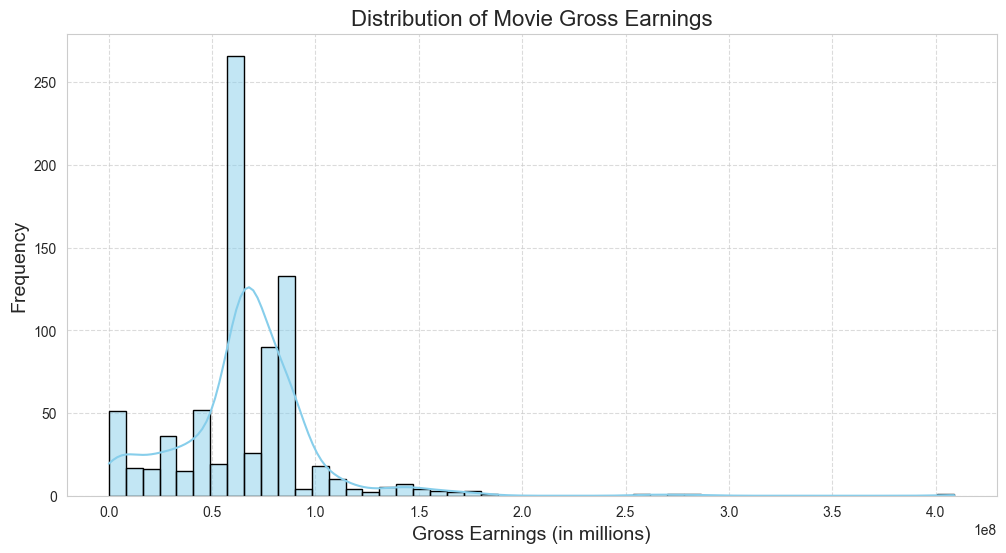

In [20]:
# Set up a professional and informative color palette
sns.set_palette("inferno")

# Set up the style for better aesthetics
sns.set_style("whitegrid")

# Set up the figure and axis for the plot
plt.figure(figsize=(12, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(xmas_movies['gross'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Add a title to the plot
plt.title('Distribution of Movie Gross Earnings', fontsize=16)

# Label the x and y axes
plt.xlabel('Gross Earnings (in millions)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [21]:
# Remove commas from the 'gross' column
top1k_movies['Gross'] = top1k_movies['Gross'].str.replace(',', '')

# Convert 'gross' column to numeric type
# 'coerce' will replace any non-numeric values with NaN
top1k_movies['Gross'] = pd.to_numeric(top1k_movies['Gross'], errors='coerce')

print(top1k_movies)

                 Series_Title Released_Year  ...           Star4        Gross
0    The Shawshank Redemption          1994  ...  William Sadler   28341469.0
1               The Godfather          1972  ...    Diane Keaton  134966411.0
2             The Dark Knight          2008  ...   Michael Caine  534858444.0
3      The Godfather: Part II          1974  ...    Diane Keaton   57300000.0
4                12 Angry Men          1957  ...    John Fiedler    4360000.0
..                        ...           ...  ...             ...          ...
995    Breakfast at Tiffany's          1961  ...     Buddy Ebsen          NaN
996                     Giant          1956  ...   Carroll Baker          NaN
997     From Here to Eternity          1953  ...      Donna Reed   30500000.0
998                  Lifeboat          1944  ...  William Bendix          NaN
999              The 39 Steps          1935  ...  Godfrey Tearle          NaN

[1000 rows x 14 columns]


In [22]:
# Create a KNNImputer object with k=5 (you can adjust k as needed).
imputer = KNNImputer(n_neighbors=5)

# Impute NaN values in the numeric columns using KNNImputer.
top1k_movies['Gross'] = imputer.fit_transform(top1k_movies[['Gross']])

# Print the DataFrame after imputing NaN values with KNN.
print("\nDataFrame after imputing NaN values with KNN:")
print(top1k_movies)


DataFrame after imputing NaN values with KNN:
                 Series_Title Released_Year  ...           Star4         Gross
0    The Shawshank Redemption          1994  ...  William Sadler  2.834147e+07
1               The Godfather          1972  ...    Diane Keaton  1.349664e+08
2             The Dark Knight          2008  ...   Michael Caine  5.348584e+08
3      The Godfather: Part II          1974  ...    Diane Keaton  5.730000e+07
4                12 Angry Men          1957  ...    John Fiedler  4.360000e+06
..                        ...           ...  ...             ...           ...
995    Breakfast at Tiffany's          1961  ...     Buddy Ebsen  6.803475e+07
996                     Giant          1956  ...   Carroll Baker  6.803475e+07
997     From Here to Eternity          1953  ...      Donna Reed  3.050000e+07
998                  Lifeboat          1944  ...  William Bendix  6.803475e+07
999              The 39 Steps          1935  ...  Godfrey Tearle  6.803475e+07

[100

In [23]:
#Generating descriptive statistics for the 'xmas_movies' dataset.
top1k_movies.describe()

IMDB_Rating  Meta_score         Gross
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  6.803475e+07
std       0.275491   12.376099  1.000371e+08
min       7.600000   28.000000  1.305000e+03
25%       7.700000   70.000000  5.012919e+06
50%       7.900000   79.000000  4.238945e+07
75%       8.100000   87.000000  6.803475e+07
max       9.300000  100.000000  9.366622e+08

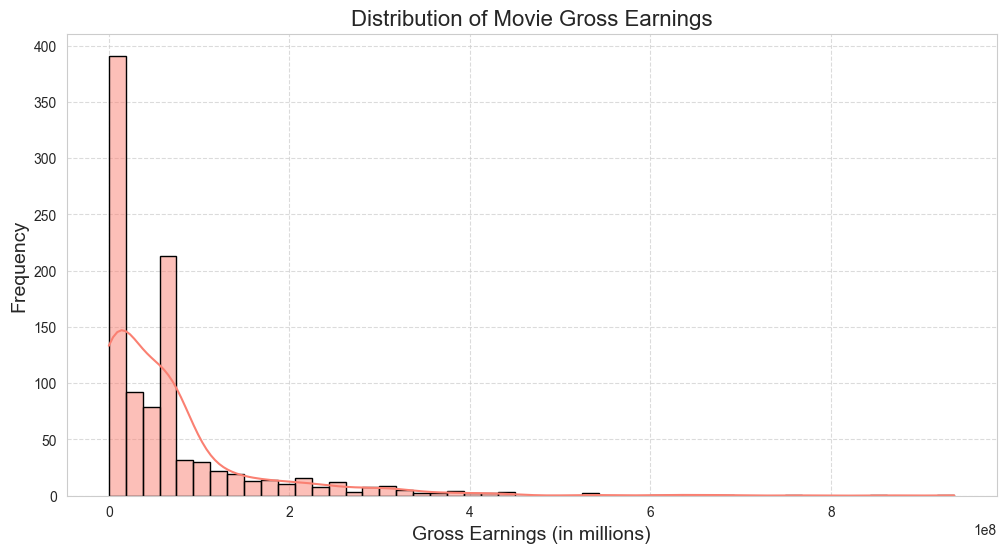

In [24]:
# Set up a professional and informative color palette
sns.set_palette("inferno")

# Set up the style for better aesthetics
sns.set_style("whitegrid")

# Set up the figure and axis for the plot
plt.figure(figsize=(12, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(top1k_movies['Gross'], bins=50, kde=True, color='salmon', edgecolor='black')

# Add a title to the plot
plt.title('Distribution of Movie Gross Earnings', fontsize=16)

# Label the x and y axes
plt.xlabel('Gross Earnings (in millions)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

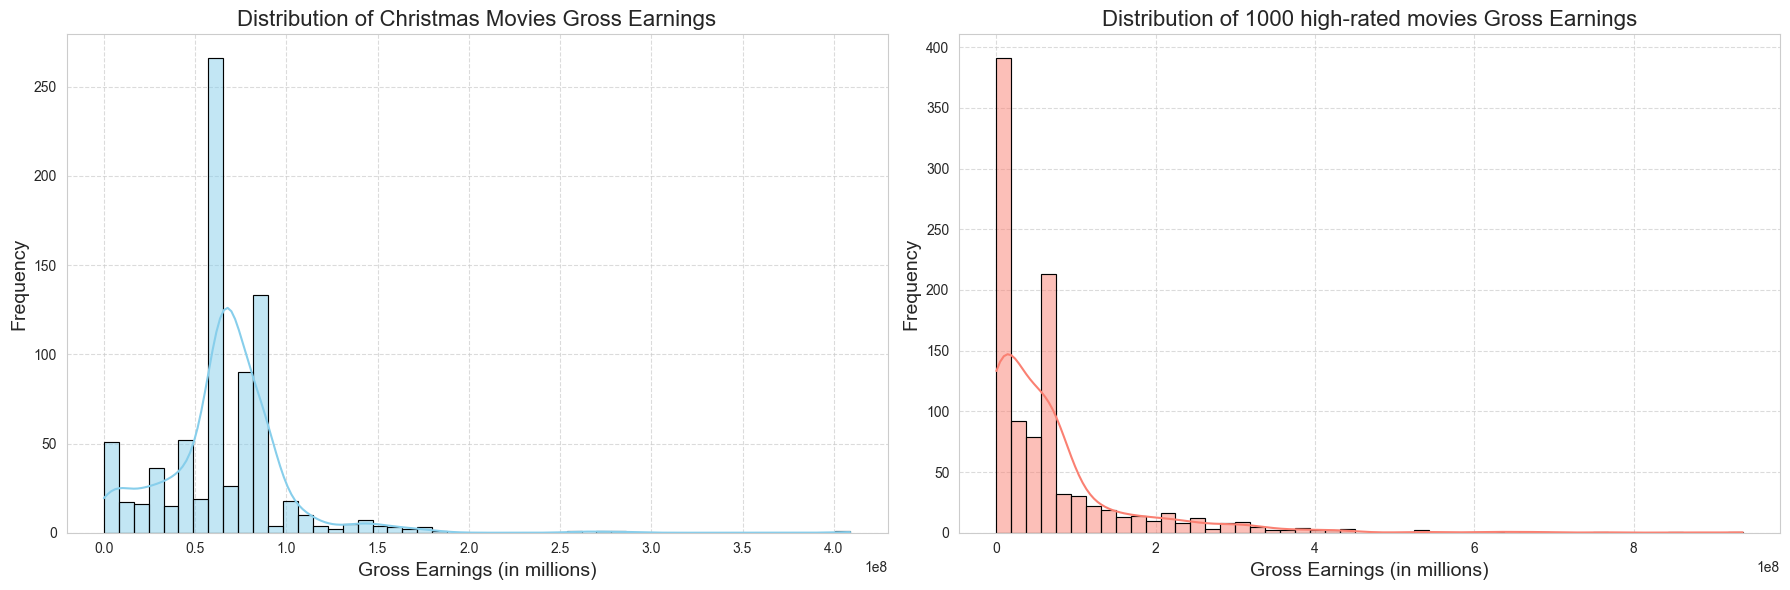

In [25]:
# Set up a professional and informative color palette (inferno)
sns.set_palette("inferno")

# Set up the style for better aesthetics
sns.set_style("whitegrid")

# Set up the figure and axes for the subplot (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Distribution of Movie Gross Earnings with inferno palette
sns.histplot(xmas_movies['gross'], bins=50, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Christmas Movies Gross Earnings', fontsize=16)
axes[0].set_xlabel('Gross Earnings (in millions)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Distribution of Grossings with the default color palette
sns.histplot(top1k_movies['Gross'], bins=50, kde=True, color='salmon',edgecolor = 'black', ax=axes[1])
axes[1].set_title('Distribution of 1000 high-rated movies Gross Earnings', fontsize=16)
axes[1].set_xlabel('Gross Earnings (in millions)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the combined plot
plt.show()

**Chart 1**: Distribution of Christmas Movies Gross Earnings

Description: The first chart displays the distribution of movie gross earnings using a histogram with a kernel density estimate (KDE). The 'inferno' color palette is applied for a visually appealing representation.

Insights:
The majority of movies seem to have earnings concentrated in a specific range, as indicated by the peak in the histogram.
The KDE curve provides a smooth estimate of the probability density function, giving a sense of the overall shape of the distribution.
The x-axis represents gross earnings (in millions), and the y-axis represents the frequency of movies falling within each earnings range.

**Chart 2**: Distribution of 1000 high-rated movies Gross Earnings

Description: The second chart also represents the distribution of gross earnings but uses the default color palette for comparison with the first chart. It employs a histogram with a KDE.

Insights:
The color palette differs from the first chart, allowing a comparison of the same distribution using different visualizations.
The shape of the distribution is consistent with the first chart, but the colors might emphasize different aspects of the data.
The x-axis represents gross earnings (in millions), and the y-axis represents the frequency of movies falling within each earnings range.

Combined Observations:
Comparing the two charts side by side allows for a visual assessment of how different color palettes impact the perception of the same distribution.
The KDE curves in both charts provide additional insights into the smoothness and trends in the data distribution.
These visualizations can be used to identify patterns, outliers, and the general characteristics of movie gross earnings in the dataset.

- ### **Word Clouds**

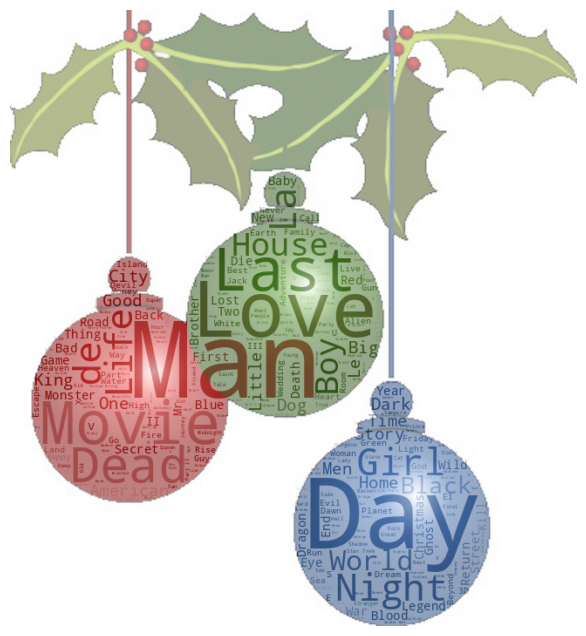

In [26]:
# Read your text data
text = ' '.join(movie_budgets['title'])

# Read the image for the Word Cloud shape
tree_bulbs_img = np.array(Image.open("images/christmas_tree_bulbs.jpg"))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", mode="RGB", repeat=True, max_words=1000, mask=tree_bulbs_img)

# Generate the Word Cloud
wordcloud.generate(text)

# Create coloring from the image
image_colors = ImageColorGenerator(tree_bulbs_img)

# Recolor the Word Cloud using the colors from the image
wordcloud_recolored = wordcloud.recolor(color_func=image_colors)

# Convert the Word Cloud image to a PIL Image
wordcloud_img = Image.fromarray(wordcloud_recolored.to_array())

# Read the image for the leaves
tree_bulbs_leaves_img = np.array(Image.open("images/christmas_tree_bulbs_leaves.jpg"))
tree_bulbs_leaves_img = Image.fromarray(tree_bulbs_leaves_img)

# Blend the Word Cloud image with the leaves image
blended_img = Image.blend(wordcloud_img, tree_bulbs_leaves_img, 0.5)


# Display the blended image
plt.figure(figsize=[8, 8])
plt.imshow(blended_img, interpolation="bilinear")
plt.axis("off")
plt.show()

## Development of a Predictive Model for Estimating Domestic Box Office Revenue in Films Using Feature Analysis

In [27]:
# Renaming columns in the DataFrame 'top1k_movies' for better clarity and consistency
top1k_movies.rename(columns={"Series_Title": "title", "Released_Year": "release_year"}, inplace=True)

# Displaying the updated DataFrame after renaming the specified columns
top1k_movies

title release_year  ...           Star4         Gross
0    The Shawshank Redemption         1994  ...  William Sadler  2.834147e+07
1               The Godfather         1972  ...    Diane Keaton  1.349664e+08
2             The Dark Knight         2008  ...   Michael Caine  5.348584e+08
3      The Godfather: Part II         1974  ...    Diane Keaton  5.730000e+07
4                12 Angry Men         1957  ...    John Fiedler  4.360000e+06
..                        ...          ...  ...             ...           ...
995    Breakfast at Tiffany's         1961  ...     Buddy Ebsen  6.803475e+07
996                     Giant         1956  ...   Carroll Baker  6.803475e+07
997     From Here to Eternity         1953  ...      Donna Reed  3.050000e+07
998                  Lifeboat         1944  ...  William Bendix  6.803475e+07
999              The 39 Steps         1935  ...  Godfrey Tearle  6.803475e+07

[1000 rows x 14 columns]

In [28]:
# Convert the 'release_year' column in the DataFrame 'xmas_movies' to string data type
xmas_movies['release_year'] = xmas_movies['release_year'].astype(str)

# Merge the 'xmas_movies' DataFrame with the 'top1k_movies' DataFrame using the 'title' and 'release_year' columns
# The 'how' parameter specifies the type of merge, and in this case, it is a left join
merged_data = pd.merge(xmas_movies, top1k_movies, on=['title', 'release_year'], how='left')

# Display the merged DataFrame that includes data from both 'xmas_movies' and 'top1k_movies'
merged_data

title  ... Gross
0                                        Love Actually  ...   NaN
1                National Lampoon's Christmas Vacation  ...   NaN
2                                             Spirited  ...   NaN
3                                           Home Alone  ...   NaN
4                       How the Grinch Stole Christmas  ...   NaN
..                                                 ...  ...   ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...   NaN
784                   Cosmic Cowboys: Céréal Christmas  ...   NaN
785  Proper Manors: Christmas Special: Christmas Pa...  ...   NaN
786  Being Millennialish: A Very Millennial Christm...  ...   NaN
787      Sacred Music at Christmas: A Choral Christmas  ...   NaN

[788 rows x 23 columns]

In [29]:
# Rename the column 'year' to 'release_year' in the DataFrame 'movie_budgets' for consistency
movie_budgets.rename(columns={"year": "release_year"}, inplace=True)

# Convert the 'release_year' column in the DataFrame 'merged_data' to string data type
merged_data['release_year'] = merged_data['release_year'].astype(str)

# Merge the 'merged_data' DataFrame with the 'movie_budgets' DataFrame using the 'title' and 'release_year' columns
# The 'how' parameter specifies the type of merge, and in this case, it is a left join
merged_data = pd.merge(merged_data, movie_budgets.astype(str), on=['title', 'release_year'], how='left')

# Convert the 'release_year' column in the DataFrame 'merged_data' to float data type
merged_data["release_year"] = merged_data["release_year"].astype(float)

# Convert the 'release_year' column back to integer data type, removing decimal points
merged_data["release_year"] = merged_data["release_year"].astype(int)

In [30]:
# Print the count of missing values in each column of the DataFrame 'merged_data'
print(merged_data.isnull().sum())

# Handle missing values in the 'imdb_rating' column by filling NaN values with the mean of the column
merged_data['imdb_rating'].fillna(merged_data['imdb_rating'].mean(), inplace=True)

# Handle missing values in the 'production budget' column by filling NaN values with 0
merged_data['production budget'].fillna(0, inplace=True)

title                  0
release_year           0
description            0
type                   0
rating               142
runtime                0
imdb_rating            0
genre                  1
director               5
stars                 12
gross                  0
Certificate          788
Runtime              788
Genre                788
IMDB_Rating          788
Overview             788
Meta_score           788
Director             788
Star1                788
Star2                788
Star3                788
Star4                788
Gross                788
date                 748
production budget    748
dtype: int64


In [31]:
# Define a list of columns to be dropped from the DataFrame 'merged_data'
columns_drop = ["Certificate", "Runtime", "Genre", "IMDB_Rating", "Overview", "Meta_score", "Director", "Gross", "Star1", "Star2", "Star3", "Star4","date"]

# Drop the specified columns from the DataFrame 'merged_data' using the 'drop' method
# The 'axis=1' parameter indicates that columns should be dropped
merged_data = merged_data.drop(columns_drop, axis=1)

# Print the updated column names of the DataFrame 'merged_data'
merged_data.columns

Index(['title', 'release_year', 'description', 'type', 'rating', 'runtime',
       'imdb_rating', 'genre', 'director', 'stars', 'gross',
       'production budget'],
      dtype='object')

In [32]:
# Create new features
merged_data['decade_released'] = (merged_data['release_year'].astype(float) // 10) * 10

# Extract information from director columns
# Example: Count the number of times a director appeared in the top 1000 movies list
director_appearances = top1k_movies['Director'].value_counts().reset_index()
director_appearances.columns = ['director', 'director_appearances']
merged_data = pd.merge(merged_data, director_appearances, on='director', how='left')
merged_data['director_appearances'].fillna(0, inplace=True)

In [33]:
merged_data

title  ...  director_appearances
0                                        Love Actually  ...                   1.0
1                National Lampoon's Christmas Vacation  ...                   0.0
2                                             Spirited  ...                   0.0
3                                           Home Alone  ...                   2.0
4                       How the Grinch Stole Christmas  ...                   5.0
..                                                 ...  ...                   ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...                   0.0
784                   Cosmic Cowboys: Céréal Christmas  ...                   0.0
785  Proper Manors: Christmas Special: Christmas Pa...  ...                   0.0
786  Being Millennialish: A Very Millennial Christm...  ...                   0.0
787      Sacred Music at Christmas: A Choral Christmas  ...                   0.0

[788 rows x 14 columns]

In [34]:
# Iterate over the range from 1 to 10 to extract individual star names from the 'stars' column
for i in range(1, 11):
    # Create a new column name based on the iteration index
    new_column_name = f'star{i}'
    
    # Extract the i-th star name from the 'stars' column using str.split and expand=True
    merged_data[new_column_name] = merged_data['stars'].str.split(', ', expand=True)[i - 1]

# Display the updated DataFrame with new star columns
print(merged_data)

                                                 title  ...       star10
0                                        Love Actually  ...         None
1                National Lampoon's Christmas Vacation  ...         None
2                                             Spirited  ...         None
3                                           Home Alone  ...         None
4                       How the Grinch Stole Christmas  ...         None
..                                                 ...  ...          ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...         None
784                   Cosmic Cowboys: Céréal Christmas  ...          NaN
785  Proper Manors: Christmas Special: Christmas Pa...  ...  Ean Bigelow
786  Being Millennialish: A Very Millennial Christm...  ...          NaN
787      Sacred Music at Christmas: A Choral Christmas  ...          NaN

[788 rows x 24 columns]


In [35]:
# Count the appearances of each star
star_counts = pd.concat([merged_data[f'star{i}'].astype(str) for i in range(1, 11)], ignore_index=True).value_counts()

# Display the updated DataFrame and star counts
print("Updated DataFrame:")
print(merged_data)
print("\nStar Counts:")
print(star_counts)

Updated DataFrame:
                                                 title  ...       star10
0                                        Love Actually  ...         None
1                National Lampoon's Christmas Vacation  ...         None
2                                             Spirited  ...         None
3                                           Home Alone  ...         None
4                       How the Grinch Stole Christmas  ...         None
..                                                 ...  ...          ...
783  Heston's Fantastical Food: Heston's Fantastica...  ...         None
784                   Cosmic Cowboys: Céréal Christmas  ...          NaN
785  Proper Manors: Christmas Special: Christmas Pa...  ...  Ean Bigelow
786  Being Millennialish: A Very Millennial Christm...  ...          NaN
787      Sacred Music at Christmas: A Choral Christmas  ...          NaN

[788 rows x 24 columns]

Star Counts:
None              3869
                   775
nan                1

In [36]:
# Define a list of labels to be dropped from the 'star_counts' Series
labels_to_drop = ["None", "", "nan"]

# Use boolean indexing to filter out rows with specified labels from the 'star_counts' Series
# The '~' operator negates the condition, selecting rows not matching the specified labels
star_counts = star_counts[~star_counts.index.isin(labels_to_drop)]

# Convert the modified 'star_counts' Series to a DataFrame with a reset index
star_counts_df = star_counts.reset_index()

# Rename the columns of the DataFrame to 'actor' and 'appearances'
star_counts_df.columns = ['actor', 'appearances']

# Display the resulting DataFrame containing actor appearances counts
print(star_counts_df)


                     actor  appearances
0            Lacey Chabert            9
1              Alicia Witt            8
2          Ashley Williams            7
3     Candace Cameron Bure            7
4          Jessica Lowndes            7
...                    ...          ...
2465        Roddy McDowall            1
2466           Tony Giroux            1
2467           Queen Ajima            1
2468          Mark Bellamy            1
2469           Ean Bigelow            1

[2470 rows x 2 columns]


In [37]:
# Calculate total gross for each movie
merged_data['total_gross'] = merged_data['gross'].fillna(0)
# Create a new dataframe to store total gross for each lead actor
lead_actors_gross = pd.DataFrame()
# Iterate through star1 to star10 columns to identify lead actors
for i in range(1, 11):
    lead_actor_data = merged_data[['title', f'star{i}', 'total_gross']]
    
    # Check if 'star{i}' is in the columns of merged_data
    if f'star{i}' in merged_data.columns:
        lead_actor_data = lead_actor_data.rename(columns={f'star{i}': 'actor'}).dropna(subset=['actor'])
        lead_actors_gross = pd.concat([lead_actors_gross, lead_actor_data])
# Merge with star_counts to get count of appearances for each lead actor
lead_actors_gross = pd.merge(lead_actors_gross, star_counts_df, how='left', on='actor')
# Calculate average gross for each lead actor
lead_actors_gross['average_gross'] = lead_actors_gross['total_gross'] / lead_actors_gross['appearances']
# Identify lead actor(s) with the highest average gross
highest_grossing_lead_actor = lead_actors_gross.loc[lead_actors_gross['average_gross'].idxmax()]
print("Highest Grossing Lead Actor(s):")
print(highest_grossing_lead_actor[['actor', 'average_gross']])

Highest Grossing Lead Actor(s):
actor            Robert Downey Jr.
average_gross          409010000.0
Name: 63, dtype: object


In [38]:
# Replace empty strings with NaN in the 'actor' column of the DataFrame 'lead_actors_gross'
lead_actors_gross['actor'].replace('', np.nan, inplace=True)

# Drop rows where the 'actor' column is empty
lead_actors_gross.dropna(subset=['actor'], inplace=True)

# If you want to reset the index after dropping rows
lead_actors_gross.reset_index(drop=True, inplace=True)

In [39]:
# Rename the 'old_column_name' to 'new_column_name'
merged_data = merged_data.rename(columns={'star1': 'actor'})
# Merge based on 'title' and actors matching in 'star1' through 'star10' columns
merged_data = pd.merge(lead_actors_gross, merged_data, on='actor', how='inner')
merged_result = merged_data.loc[:, ~merged_data.columns.duplicated()]

In [40]:
# Replace empty strings with NaN in the entire DataFrame 'merged_result'
merged_result.replace('', np.nan, inplace=True)

# Display the merged DataFrame
merged_data

title_x  ... total_gross_y
0                                         Love Actually  ...    59700000.0
1                 National Lampoon's Christmas Vacation  ...    71320000.0
2                                A Christmas in Vermont  ...    71320000.0
3                                              Spirited  ...   159074000.0
4                                              Spirited  ...   173400000.0
...                                                 ...  ...           ...
1708            CBS News Sunday Morning: Episode #45.13  ...    15810000.0
1709  CTV National News with Omar Sachedina: Episode...  ...    70198000.0
1710                                          $#!T Show  ...    85718000.0
1711  Heston's Fantastical Food: Heston's Fantastica...  ...   150014000.0
1712  Proper Manors: Christmas Special: Christmas Pa...  ...    73918000.0

[1713 rows x 29 columns]

In [41]:

# Drop rows where the 'actor' column is empty
merged_data.dropna(subset=['actor'], inplace=True)

# If you want to reset the index after dropping rows
lead_actors_gross.reset_index(drop=True, inplace=True)

In [42]:
# Specify the columns to be dropped
columns_to_drop = ["average_gross","title_y","release_year","description","appearances","stars","gross","director_appearances","star2","star3","star4","star5","star6","star7","star8","star9","star10","total_gross_y"]

In [43]:
# Remove specified columns from the DataFrame 'merged_data'.
merged_data = merged_data.drop(columns = columns_to_drop)

# Remove duplicate rows based on the 'title_x' column in the DataFrame 'merged_data'.
merged_data= merged_data.drop_duplicates(subset='title_x')

In [44]:
merged_data

title_x  ... decade_released
0                                         Love Actually  ...          2000.0
1                 National Lampoon's Christmas Vacation  ...          1980.0
2                                A Christmas in Vermont  ...          1980.0
3                                              Spirited  ...          2020.0
5                                                   Elf  ...          2020.0
...                                                 ...  ...             ...
1708            CBS News Sunday Morning: Episode #45.13  ...          1970.0
1709  CTV National News with Omar Sachedina: Episode...  ...          2020.0
1710                                          $#!T Show  ...          2020.0
1711  Heston's Fantastical Food: Heston's Fantastica...  ...          2010.0
1712  Proper Manors: Christmas Special: Christmas Pa...  ...          2010.0

[754 rows x 11 columns]

In [45]:
# Count the number of appearances for each director and create a new column 'director_appearances'.
# The 'groupby' method groups the DataFrame 'merged_data' by the 'director' column, and 'transform' counts the occurrences.
merged_data['director_appearances'] = merged_data.groupby('director')['director'].transform('count')

# Count the number of appearances for each actor and create a new column 'actor_appearances'.
merged_data['actor_appearances'] = merged_data.groupby('actor')['actor'].transform('count')

In [46]:
# Rename specific columns in the DataFrame 'merged_data'.
# The dictionary 'rename_columns' defines a mapping between old column names and new column names.
rename_columns = {"title_x":"title","total_gross_x":"total_gross"}

# Apply the column name changes to the DataFrame 'merged_data'.
# The 'rename' method is used with the 'columns' parameter to perform the renaming operation.
merged_data = merged_data.rename(columns=rename_columns)

In [47]:
# Display the first few rows of the DataFrame 'merged_data'.
merged_data.head()

title  ... actor_appearances
0                          Love Actually  ...                 1
1  National Lampoon's Christmas Vacation  ...                 2
2                 A Christmas in Vermont  ...                 2
3                               Spirited  ...                 2
5                                    Elf  ...                 2

[5 rows x 13 columns]

In [48]:
# Print the data types of each column in the DataFrame 'merged_data'
print(merged_data.dtypes)

title                    object
actor                    object
total_gross             float64
type                     object
rating                   object
runtime                 float64
imdb_rating             float64
genre                    object
director                 object
production budget        object
decade_released         float64
director_appearances      int64
actor_appearances         int64
dtype: object


In [49]:
# Convert 'production budget' from object to float
merged_data['production budget'] = merged_data['production budget'].astype(float)

<AxesSubplot: >

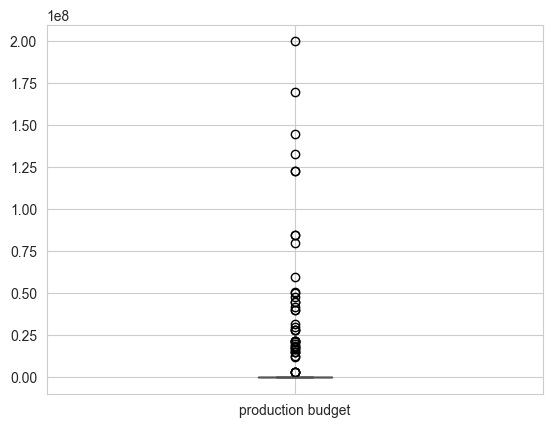

In [50]:
# Create a boxplot for the 'production budget' column in the DataFrame 'merged_data'
merged_data.boxplot(column='production budget')

In [51]:
# Extract the 'production budget' column from the DataFrame 'merged_data' and assign it to the variable 'column_name'
column_name = merged_data["production budget"]

# Count the number of zero values in the 'production budget' column and assign it to the variable 'num_zeros'
num_zeros = (merged_data["production budget"] == 0).sum()

# Print the count of zero values in the 'production budget' column
print(num_zeros)

710


In [52]:
# Extract a subset of the 'production budget' column from the DataFrame 'merged_data' excluding zero values
no_zero_value = merged_data["production budget"][merged_data["production budget"] != 0]

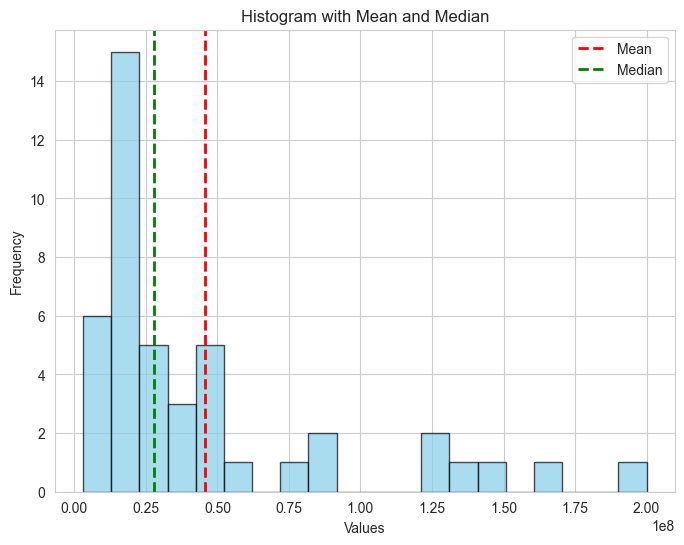

In [53]:
# Calculate the mean and median of the 'none_zero_value' Series
mean_value = no_zero_value.mean()
median_value = no_zero_value.median()

# Create a histogram for the 'none_zero_value' Series using Matplotlib
# The histogram is configured with 20 bins, colored in skyblue with black edges, and an alpha (transparency) value of 0.7
plt.figure(figsize=(8, 6))
plt.hist(no_zero_value, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Adding legend
plt.legend()

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Mean and Median')

# Show the plot
plt.show()

In [54]:
# Calculate the mean excluding zero values
middle_value = merged_data["production budget"][merged_data["production budget"] != 0].median().round(0)

# Fill zero values with the mean
merged_data["production budget"] = merged_data["production budget"].replace(0, middle_value)

In [55]:
merged_data

title  ... actor_appearances
0                                         Love Actually  ...                 1
1                 National Lampoon's Christmas Vacation  ...                 2
2                                A Christmas in Vermont  ...                 2
3                                              Spirited  ...                 2
5                                                   Elf  ...                 2
...                                                 ...  ...               ...
1708            CBS News Sunday Morning: Episode #45.13  ...                 1
1709  CTV National News with Omar Sachedina: Episode...  ...                 1
1710                                          $#!T Show  ...                 1
1711  Heston's Fantastical Food: Heston's Fantastica...  ...                 1
1712  Proper Manors: Christmas Special: Christmas Pa...  ...                 1

[754 rows x 13 columns]

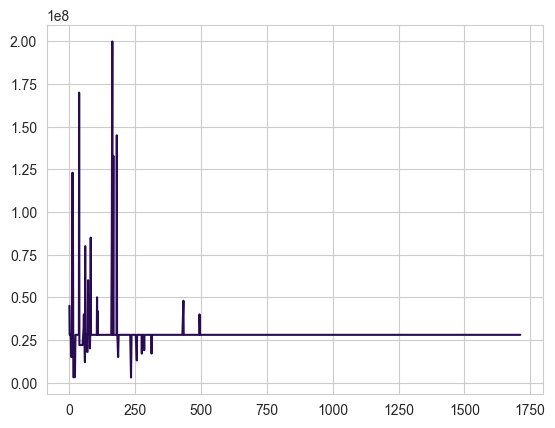

In [56]:
# Create a line plot for the 'production budget' column in the DataFrame 'merged_data'
plt.plot(merged_data['production budget'])

# Display the plot
plt.show()


In [57]:
# Select columns of numeric data type from the DataFrame 'merged_data'
numcols = merged_data.select_dtypes(['number']).columns

# Display the first few rows of the DataFrame containing only numeric columns
merged_data[numcols].head()

total_gross  runtime  ...  director_appearances  actor_appearances
0   59700000.0    135.0  ...                     1                  1
1   71320000.0     97.0  ...                     2                  2
2   88718000.0     97.0  ...                     2                  2
3  159074000.0    127.0  ...                     3                  2
5  173400000.0    127.0  ...                     3                  2

[5 rows x 7 columns]

In [58]:
# catcols = df.columns[df.dtypes=='O']  # inferior method
catcols = merged_data.select_dtypes(['object']).columns
merged_data[catcols].head()

title  ...             director
0                          Love Actually  ...       Richard Curtis
1  National Lampoon's Christmas Vacation  ...  Jeremiah S. Chechik
2                 A Christmas in Vermont  ...  Jeremiah S. Chechik
3                               Spirited  ...          Sean Anders
5                                    Elf  ...          Sean Anders

[5 rows x 6 columns]

## Correlation analysis of numerical features

The analysis reveals modest correlations among numerical features. Notably, the most substantial correlations, measuring 0.57 and 0.49, are observed between "director_appearances" and "actor_appearances," as well as between "total_gross" and "decade_release." However, conventional practice often dismisses correlations below 0.7 as inconsequential. Consequently, we consider the numerical features to be largely independent in our assessment.

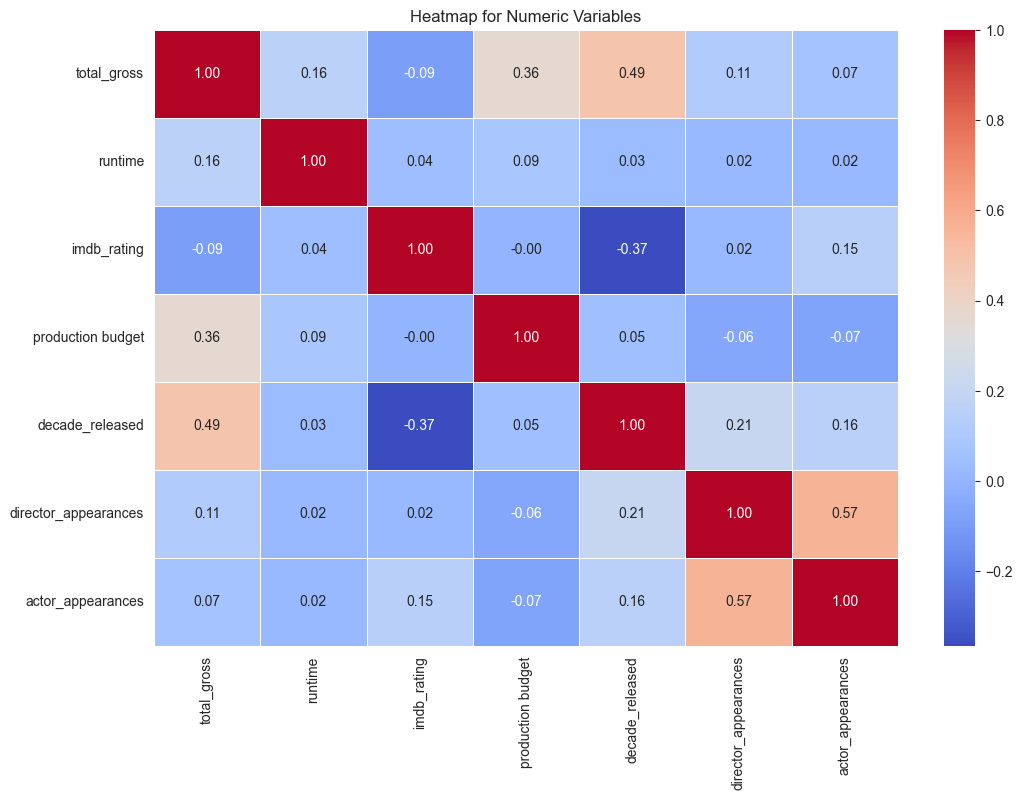

In [59]:


# Create a subset DataFrame with selected columns
heatmap_data = merged_data[numcols]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap for Numeric Variables')
plt.show()

In [60]:
# convert object columns to categorical columns
merged_data[catcols] = merged_data[catcols].astype('category')

In [61]:
# now all Dtypes are either numbers or category.
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 1712
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   title                 754 non-null    category
 1   actor                 754 non-null    category
 2   total_gross           754 non-null    float64 
 3   type                  754 non-null    category
 4   rating                623 non-null    category
 5   runtime               754 non-null    float64 
 6   imdb_rating           754 non-null    float64 
 7   genre                 754 non-null    category
 8   director              754 non-null    category
 9   production budget     754 non-null    float64 
 10  decade_released       754 non-null    float64 
 11  director_appearances  754 non-null    int64   
 12  actor_appearances     754 non-null    int64   
dtypes: category(6), float64(5), int64(2)
memory usage: 137.6 KB


##  Verify the presence of unrecorded values denoted by the numeral 0.

In [62]:
# count the na's
merged_data.isna().sum()

title                     0
actor                     0
total_gross               0
type                      0
rating                  131
runtime                   0
imdb_rating               0
genre                     0
director                  0
production budget         0
decade_released           0
director_appearances      0
actor_appearances         0
dtype: int64

In [63]:
# 1. Calculate the mode (most frequent value) of the 'rating' column in the DataFrame 'merged_data'.
mode_value = merged_data['rating'].mode()[0]

# 2. Fill missing values in the 'rating' column with the calculated mode value.
#    This is done using the 'fillna' method, which replaces NaN (missing) values with the specified value.
#    The 'inplace=True' parameter modifies the 'merged_data' DataFrame in-place without the need for assignment.
merged_data['rating'].fillna(mode_value, inplace=True)

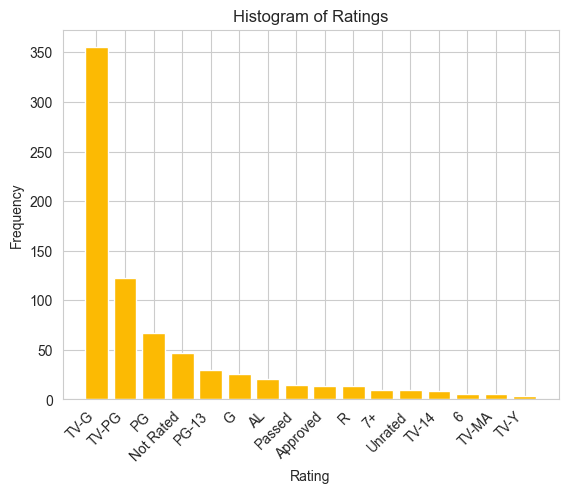

In [64]:
# Count the occurrences of each category
rating_counts = merged_data['rating'].value_counts()

# Create a vertical bar chart
plt.bar(rating_counts.index, rating_counts, color='#fcba03')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Set x-axis ticks and labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better visibility

# Show the plot
plt.show()

## Principal Component Analysis (PCA)

Exploring Dimensionality Reduction and Variability in the Dataset

In [65]:
# separate columns based on PCA 
pca_cols = merged_data.select_dtypes(['number']).columns
print(len(pca_cols), 'features used for PCA are', pca_cols.tolist())

7 features used for PCA are ['total_gross', 'runtime', 'imdb_rating', 'production budget', 'decade_released', 'director_appearances', 'actor_appearances']


In [66]:
# Display the first few rows of selected columns ('pca_cols') from the DataFrame 'merged_data'
merged_data[pca_cols].head()

total_gross  runtime  ...  director_appearances  actor_appearances
0   59700000.0    135.0  ...                     1                  1
1   71320000.0     97.0  ...                     2                  2
2   88718000.0     97.0  ...                     2                  2
3  159074000.0    127.0  ...                     3                  2
5  173400000.0    127.0  ...                     3                  2

[5 rows x 7 columns]

In [67]:
# Assuming you have a variable named total_gross with a string value
total_gross_str = str(merged_data['total_gross'])  # Convert the Series object to a string

# Check if the string is a valid number
if total_gross_str.isdigit() or (total_gross_str[0] == '-' and total_gross_str[1:].isdigit()):
    # Convert the string to a float
    merged_data["total_gross"] = float(total_gross_str)
    print("Conversion successful:", merged_data["total_gross"])  # Fixed the variable name
else:
    # Handle the case where the conversion fails
    print(f"Error: Could not convert '{total_gross_str}' to float.")

Error: Could not convert '0        59700000.0
1        71320000.0
2        88718000.0
3       159074000.0
5       173400000.0
           ...     
1708     15810000.0
1709     70198000.0
1710     85718000.0
1711    150014000.0
1712     73918000.0
Name: total_gross, Length: 754, dtype: float64' to float.


In [68]:
#The selected columns are stored in the variable 'pca_cols'
X = merged_data[pca_cols]

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X.values)  # Remove .values to keep X as a DataFrame

# instantiate PCA class
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)

#Generate column names for the new DataFrame 'df_pca' based on the number of principal components
columns = [f'PC{i+1}' for i in range(principalComponents.shape[1])]
#Create a new DataFrame 'df_pca' using the principal components data and the generated column names
df_pca = pd.DataFrame(data=principalComponents, columns=columns)


# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(principalComponents.shape[1])]
df_pca = pd.DataFrame(data=principalComponents, columns=columns)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [69]:
#Display the rows of the df_pca containing only numeric columns
print(df_pca)

          PC1       PC2
0   -0.401994  0.836583
1   -1.033027 -0.350724
2   -0.761217 -0.190999
3    1.941906  1.161387
4    2.165722  1.292909
..        ...       ...
749 -2.844307 -0.739321
750  0.058625  1.042524
751 -0.056815  0.773317
752  1.065441  1.701546
753 -0.814035  0.437890

[754 rows x 2 columns]


In [70]:
# Access insights into the contribution of each principal component to the overall variance
explained_variance_ratio

array([0.2685616, 0.2208605])

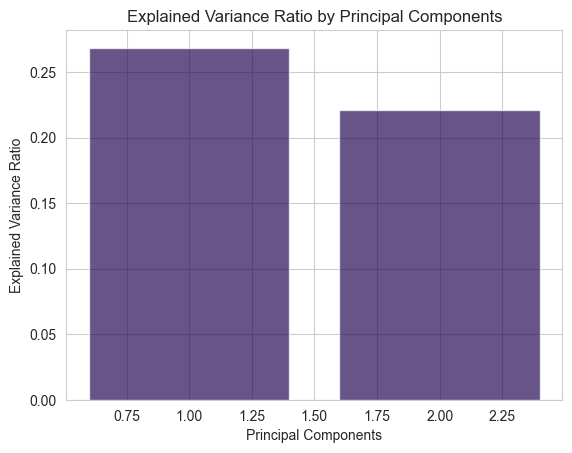

In [71]:
# Plotting the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

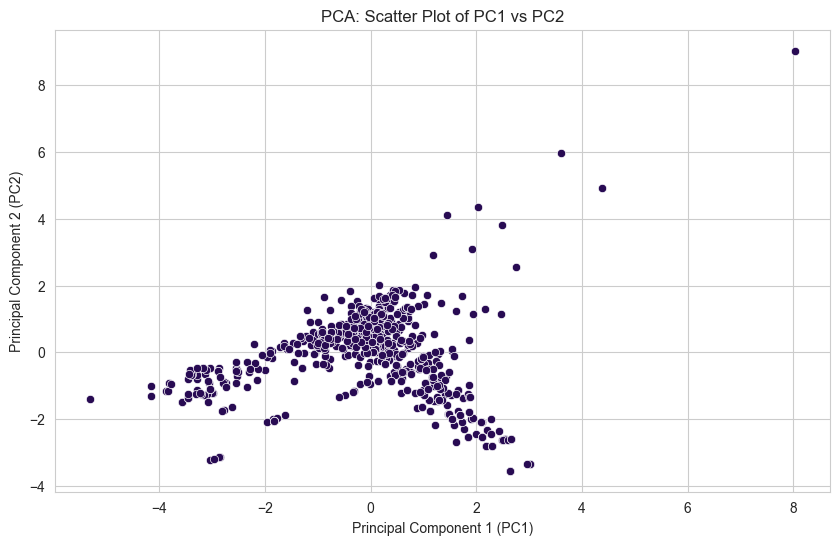

In [72]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA: Scatter Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

## Correspondence Analysis (CA)

 Uncovering Relationships in Categorical Data

In [73]:
# separate columns based on MCA

mca_cols = merged_data.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

6 features used for MCA are ['title', 'actor', 'type', 'rating', 'genre', 'director']


In [74]:
# Display the first few rows of selected columns ('mca_cols') from the DataFrame 'merged_data'
merged_data[mca_cols].head()

title  ...             director
0                          Love Actually  ...       Richard Curtis
1  National Lampoon's Christmas Vacation  ...  Jeremiah S. Chechik
2                 A Christmas in Vermont  ...  Jeremiah S. Chechik
3                               Spirited  ...          Sean Anders
5                                    Elf  ...          Sean Anders

[5 rows x 6 columns]

In [75]:
# Create an instance of the Multiple Correspondence Analysis (MCA) class from the prince library
mca = prince.MCA(
    n_components=5,        # Number of dimensions/components to keep
    n_iter=3,              # Number of iterations
    copy=True,             # Whether to make a copy of the data
    check_input=True,      # Whether to check the input data for validity
    engine='sklearn',      # Engine used for computation (sklearn or scipy)
    random_state=42        # Random seed for reproducibility
)

# Fit the MCA model to the selected columns ('mca_cols') of the DataFrame 'merged_data'
mca = mca.fit(merged_data[mca_cols])


In [76]:
# Use one-hot encoding to convert categorical columns to binary indicators in 'merged_data'
one_hot = pd.get_dummies(merged_data[mca_cols])

# Create an instance of the Multiple Correspondence Analysis (MCA) class without one-hot encoding
mca_no_one_hot = prince.MCA(one_hot=False)

# Fit the MCA model to the one-hot encoded data
mca_no_one_hot = mca_no_one_hot.fit(one_hot)

In [77]:
# Calculate row coordinates based on the MCA model for the selected categorical columns ('mca_cols') in 'merged_data'
row_coordinates = mca.row_coordinates(merged_data[mca_cols])

# Display the first few rows of the calculated row coordinates
row_coordinates.head()


0         1         2         3         4
0 -1.095201 -0.305817  0.677902 -0.621620  1.164840
1  0.238448 -0.111744  0.196745 -0.202096 -0.040309
2  0.252495 -0.113690  0.197554 -0.214274 -0.040577
3 -0.346985  0.187005  0.892188  0.017781  0.065981
5 -0.331358  0.187078  0.907195  0.003639  0.060669

In [78]:
# Calculate column coordinates based on the MCA model for the selected categorical columns ('mca_cols') in 'merged_data'
column_coordinates = mca.column_coordinates(merged_data[mca_cols])

# Display the first few rows of the calculated column coordinates
column_coordinates.head()


0         1  ...         3         4
title_$#!T Show                 1.107780 -1.560393  ... -1.505008 -3.142363
title_'Tis the Season for Love -0.815933  0.470661  ... -0.985390  0.020688
title_'Twas the Night          -1.055154 -0.563856  ... -0.219468  0.559057
title_10 Horas para o Natal    -0.788930 -1.431583  ... -0.874235 -0.053107
title_12 Dates of Christmas    -0.681532 -0.745339  ...  0.785781  0.688800

[5 rows x 5 columns]

In [79]:
# Create a scatter plot based on the MCA model for the selected categorical columns ('mca_cols') in 'merged_data'
mca.plot(
    merged_data[mca_cols],
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)


alt.LayerChart(...)

# Model Comparison: RandomForest vs. XGBoost vs. Linear Regression

### Introduction

The choice of a predictive model hinges on several critical factors, including performance metrics, feature importances, and interpretability. In the comparison between RandomForest, XGBoost, and Linear Regression models for predicting total movie gross, the following evaluation metrics were considered:

## **Performance Metrics**

### RandomForest:

- **R2 Score**: 0.42
- **Mean Squared Error**: 1.04 trillion
- **Feature Importances (numeric variables)**:
- runtime: 0.269
- imdb_rating: 0.147
- production budget: 0.092
- decade_released: 0.385
- director_appearances: 0.069
- actor_appearances: 0.039

### XGBoost:

- **R2 Score**: 0.37
- **Mean Squared Error**: 1.12 trillion
- **Feature Importances (numeric variables)**:
- runtime: 0.106
- imdb_rating: 0.063
- production budget: 0.128
- decade_released: 0.547
- director_appearances: 0.119
- actor_appearances: 0.036


### Linear Regression:

- **R2 Score**: 0.41
- **Mean Squared Error**: 1.06 trillion
- **Feature Importances (coefficients**):
- runtime: 79.71
- imdb_rating: -22.47
- production budget: -144.34
- decade_released: 41.35
- director_appearances: 0.0
- actor_appearances: 91.15
- **Intercept**: -1.52 billion

## Interpretation

The RandomForest model emerges as the preferred choice based on its superior performance metrics. It achieves the highest R2 Score (0.42) and the lowest Mean Squared Error (1.04 trillion), indicating a better fit to the data and more accurate predictions.

Additionally, the feature importances of the RandomForest model highlight the significance of various numeric variables, such as the decade of release, runtime, and IMDb rating, in predicting total movie gross.

While XGBoost and Linear Regression models demonstrate reasonable performance, they fall slightly short in comparison. XGBoost, despite its notable feature importances, exhibits a higher Mean Squared Error. Linear Regression, with substantial coefficients, is more sensitive to changes in predictor variables and presents a lower R2 Score.

In conclusion, the RandomForest model stands out for its predictive accuracy, supported by a comprehensive understanding of feature importance. It strikes a balance between performance and interpretability, making it a robust choice for predicting total movie gross in this context.



## RandomForestRegression Model

In [80]:

# Separate features and target variable
X_rf = merged_data.drop('total_gross', axis=1)
y_rf = merged_data['total_gross']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_rf.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_rf.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer that applies transformers to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with the preprocessor and the RandomForestRegressor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model_rf.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
r2_rf = r2_score(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)

print(f'R2 Score: {r2_rf:.2f}')
print(f'Mean Squared Error: {mse_rf:.2f}')

# Print the feature importances of numeric variables
numeric_columns = numeric_cols.tolist()
numeric_importances = dict(zip(numeric_columns, model_rf.named_steps['regressor'].feature_importances_[:len(numeric_columns)]))
print("\nFeature importances of numeric variables:")
for feature, importance in numeric_importances.items():
    print(f'{feature}: {importance}')

R2 Score: 0.42
Mean Squared Error: 1043265709978750.50

Feature importances of numeric variables:
runtime: 0.26918619280819084
imdb_rating: 0.1465580531932229
production budget: 0.09172209694192886
decade_released: 0.3846515077221926
director_appearances: 0.06903242929859442
actor_appearances: 0.03884972003587035


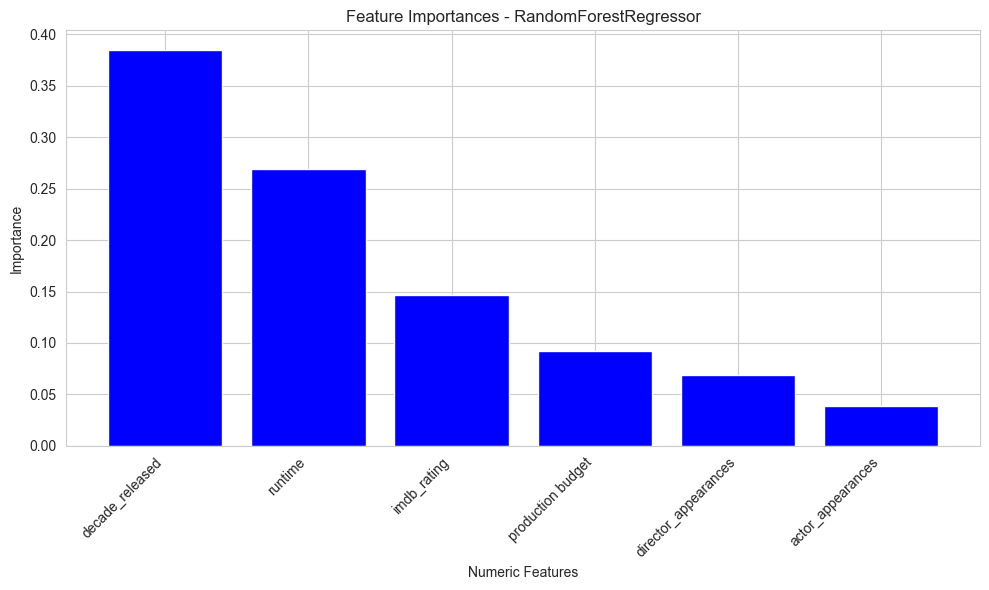

In [81]:
# Extract feature importances
feature_importances = model_rf.named_steps['regressor'].feature_importances_
numeric_columns = numeric_cols.tolist()

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': numeric_columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Numeric Features')
plt.ylabel('Importance')
plt.title('Feature Importances - RandomForestRegressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

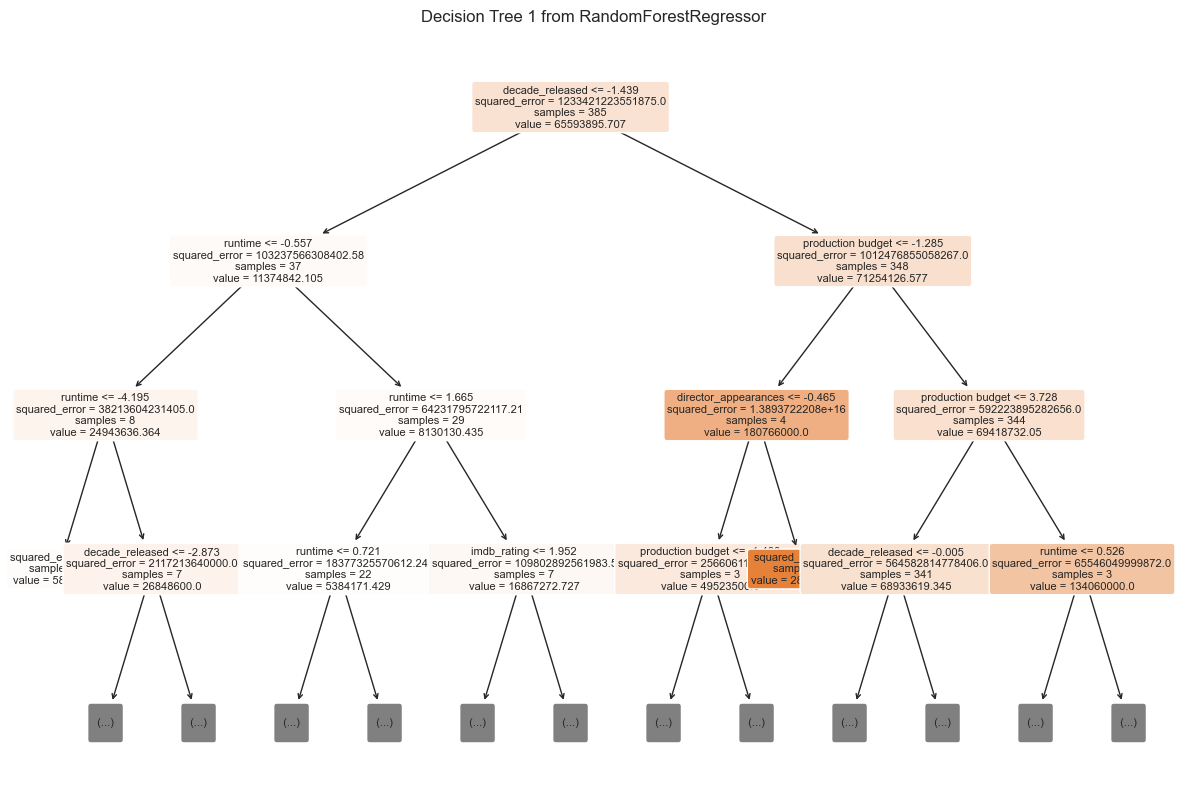

In [82]:
# Extract a single tree from the forest (assuming n_estimators > 1)
tree_number = 0  # You can change this to visualize a different tree
single_tree = model_rf.named_steps['regressor'].estimators_[tree_number]

# Plot the tree with customization for better readability
plt.figure(figsize=(15, 10))
plot_tree(single_tree, feature_names=numeric_columns, filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title(f'Decision Tree {tree_number + 1} from RandomForestRegressor')
plt.show()


## XGBoost Model

In [83]:
# Separate features and target variable
X_xgb = merged_data.drop('total_gross', axis=1)
y_xgb = merged_data['total_gross']

# Split the data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
num_cols = X_xgb.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_xgb.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer that applies transformers to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Create a pipeline with the preprocessor and the XGBRegressor with hyperparameters
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,  # Number of boosting rounds
        max_depth=6,       # Maximum depth of the tree
        learning_rate=0.1, # Step size shrinkage used in update to prevent overfitting
        random_state=42    # Random state for reproducibility
    ))
])

# Fit the model
model_xgb.fit(X_train_xgb, y_train_xgb)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test_xgb)

# Evaluate the model
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)

print(f'R2 Score XGB: {r2_xgb:.2f}')
print(f'Mean Squared Error: {mse_xgb:.2f}')

# Print the feature importances of numeric variables
numeric_columns = numeric_cols.tolist()
numeric_importances = dict(zip(numeric_columns, model_xgb.named_steps['regressor'].feature_importances_[:len(numeric_columns)]))
print("\nFeature importances of numeric variables:")
for feature, importance in numeric_importances.items():
    print(f'{feature}: {importance}')


R2 Score XGB: 0.37
Mean Squared Error: 1122769989126569.75

Feature importances of numeric variables:
runtime: 0.10606711357831955
imdb_rating: 0.0633145198225975
production budget: 0.12817548215389252
decade_released: 0.5468242764472961
director_appearances: 0.1194094568490982
actor_appearances: 0.03620917350053787


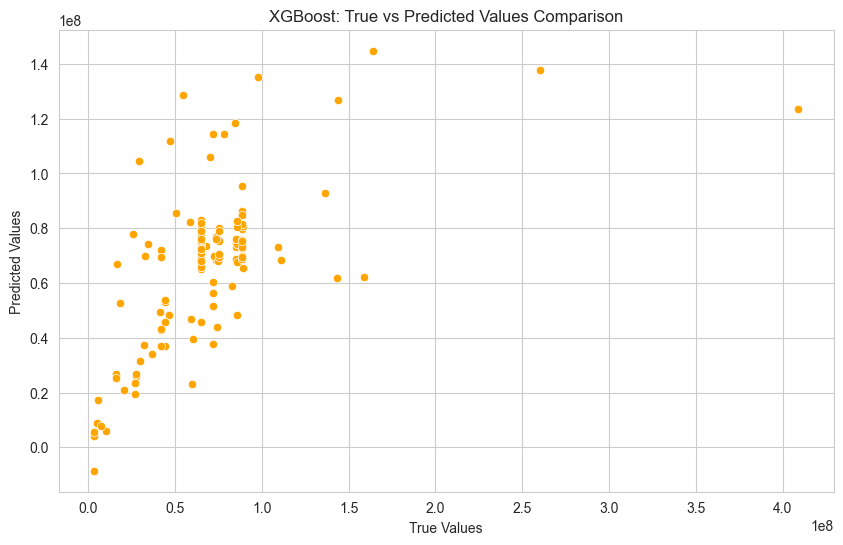

In [84]:
# Create a DataFrame for easier plotting
comparison_df_xgb = pd.DataFrame({'True Values': y_test_xgb, 'XGB Predictions': y_pred_xgb})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True Values', y='XGB Predictions', data=comparison_df_xgb, color='orange')

plt.title('XGBoost: True vs Predicted Values Comparison')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


## Linear Regression Model

In [85]:


# Drop any missing values for simplicity
data = merged_data.dropna()

# Selecting relevant columns
selected_columns = ['title', 'actor', 'type', 'rating', 'runtime', 'imdb_rating',
                    'genre', 'director', 'production budget', 'decade_released',
                    'director_appearances', 'actor_appearances', 'total_gross']

# Extract features and target variable
X_re = data[selected_columns].drop('total_gross', axis=1)  # Features
y_re = data['total_gross']  # Target variable

# Filter only numeric columns
numeric_columns = ['runtime', 'imdb_rating', 'production budget', 'decade_released', 'director_appearances', 'actor_appearances']
X_numeric_re = X_re[numeric_columns]

# Encode categorical variables using one-hot encoding
categorical_columns = ['title', 'actor', 'type', 'rating', 'genre', 'director']
transformers = [('onehot', OneHotEncoder(), categorical_columns)]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')
X_encoded_re = ct.fit_transform(X_re)  # Fix: Use X_re instead of X_numeric_re

# Split the data into training and testing sets
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_encoded_re, y_re, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model_re = LinearRegression()
model_re.fit(X_train_re, y_train_re)

# Make predictions on the test set
y_pred_re = model_re.predict(X_test_re)

# Evaluate the model
mse_re = mean_squared_error(y_test_re, y_pred_re)
r2_re = r2_score(y_test_re, y_pred_re)

# Display evaluation metrics
print(f'\nLinear Regression Model Evaluation:')
print(f'Mean Squared Error: {mse_re}')
print(f'R2 Score: {r2_re}')

# Print the feature importances of numeric variables
numeric_importances = dict(zip(numeric_columns, model_re.coef_[:len(numeric_columns)]))
print("\nFeature importances of numeric variables:")
for feature, importance in numeric_importances.items():
    print(f'{feature}: {importance}')

# Print the intercept
intercept = model_re.intercept_
print(f'\nIntercept: {intercept}')


Linear Regression Model Evaluation:
Mean Squared Error: 1062868581725470.8
R2 Score: 0.405605666394116

Feature importances of numeric variables:
runtime: 79.70954607840059
imdb_rating: -22.471570834707556
production budget: -144.33839818678646
decade_released: 41.35253801998145
director_appearances: 0.0
actor_appearances: 91.15029216869732

Intercept: -1523230926.7052836


The equation will be in the form:
##  Total Gross = Intercept + (Coef1×Feature1) + (Coef2×Feature2)+…+(CoefN×FeatureN)

In [86]:
# Coefficients and intercept
coefficients = [79.70954607840059, -22.471570834707556, -144.33839818678646, 41.35253801998145, 0.0, 91.15029216869732]
intercept = -1523230926.7052836

# Feature names
feature_names = ['runtime', 'imdb_rating', 'production budget', 'decade_released', 'director_appearances', 'actor_appearances']

# Display the linear regression function
equation = f"Total Gross = {intercept:.2f}"
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
    
print(equation)


Total Gross = -1523230926.71 + (79.71 * runtime) + (-22.47 * imdb_rating) + (-144.34 * production budget) + (41.35 * decade_released) + (0.00 * director_appearances) + (91.15 * actor_appearances)


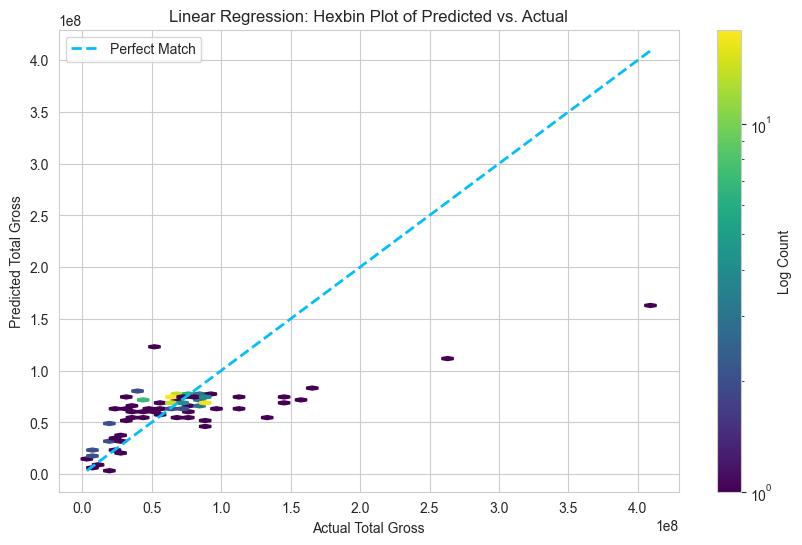

In [87]:
# Hexbin plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.hexbin(y_test_re, y_pred_re, gridsize=50, cmap='viridis', bins='log', mincnt=1)

# Plotting the perfect match line
plt.plot([min(y_test_re), max(y_test_re)], [min(y_test_re), max(y_test_re)], color='#03befc', linestyle='--', lw=2, label='Perfect Match')

plt.title('Linear Regression: Hexbin Plot of Predicted vs. Actual')
plt.xlabel('Actual Total Gross')
plt.ylabel('Predicted Total Gross')
plt.colorbar(label='Log Count')
plt.legend()
plt.show()

## Evaluate the model using appropriate metrics.

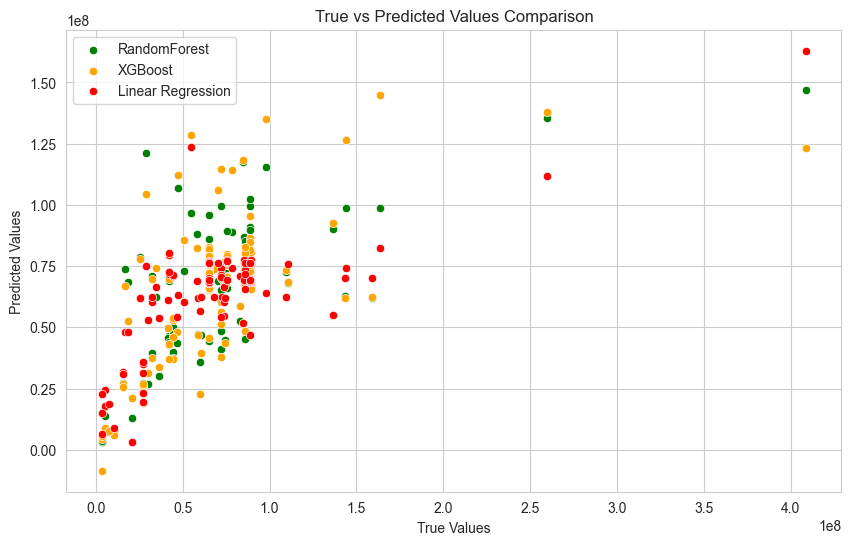

In [93]:
# Assuming you have already trained RandomForestRegressor , XGBRegressor and Linear Regression models

# Predictions for RandomForestRegressor
y_pred_rf = model_rf.predict(X_test_rf)

# Predictions for XGBoost model
y_pred_xgb = model_xgb.predict(X_test_rf)

# Prediction for Linear Regression model
y_pred_re = model_re.predict(X_test_re)

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame({'True Values': y_test_rf, 'RF Predictions': y_pred_rf, 'XGB Predictions': y_pred_xgb, 'Linear Regression': y_pred_re})

# Scatter plot with different colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True Values', y='RF Predictions', data=comparison_df, label='RandomForest', color='green')
sns.scatterplot(x='True Values', y='XGB Predictions', data=comparison_df, label='XGBoost', color='orange')
sns.scatterplot(x='True Values', y='Linear Regression',data = comparison_df, label='Linear Regression', color='red')


plt.title('True vs Predicted Values Comparison')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Let's delve into more details and explanations for each aspect mentioned:

1. **Predictive Accuracy**:

- RandomForest is known for its high predictive accuracy. It is an ensemble learning method that builds multiple decision trees during training and merges them together to get a more accurate and stable prediction.
- The model's ability to capture complex relationships within the data, handle non-linearity, and mitigate overfitting contributes    to its accuracy in making predictions.


2. **Comprehensive Understanding of Feature Importance**:

- RandomForest models provide insights into the importance of each feature in making predictions. Feature importance is calculated based on how much each feature contributes to the reduction in impurity (e.g., Gini impurity) across all the decision trees in the forest.
- This understanding allows analysts and data scientists to identify the key factors that influence the predicted total movie gross. Features with higher importance values have a more substantial impact on the model's predictions.

3. **Balance Between Performance and Interpretability**:

- RandomForest strikes a balance between model performance and interpretability. While it is considered a complex model due to the ensemble of decision trees, it is often more interpretable than other complex models like deep neural networks.
- The interpretability comes from the ability to visualize feature importances, understand decision tree structures, and analyze how individual features contribute to the model's output. This makes it easier for stakeholders to comprehend and trust the model's predictions.


4. **Robust Choice for Predicting Total Movie Gross**:

- Given its strengths in predictive accuracy, feature importance analysis, and balance between performance and interpretability, RandomForest is considered a robust choice for predicting total movie gross.
- The model's versatility makes it suitable for handling various types of features, including both numeric and categorical, making it well-suited for the diverse characteristics often present in movie-related datasets.


In summary, the RandomForest model is highlighted for its holistic strengths, making it a valuable tool for predicting total movie gross in the specific context described. Its predictive capabilities, feature importance analysis, and interpretability collectively contribute to its effectiveness in this application.

## Explain some of the limitations of the models you have developed. What other data might help improve the model?

## Limitations of the Model:

1. **Overfitting:**

RandomForest models, while effective, can be prone to overfitting, especially if the number of trees in the ensemble is too high. This may result in a model that performs exceptionally well on the training data but fails to generalize to new, unseen data.

2. **Interpretability:**

Despite efforts to strike a balance between performance and interpretability, RandomForest models can still be challenging to interpret due to the complexity of the ensemble structure. Understanding the decision-making process for individual predictions may not be straightforward.

3. **Handling of Categorical Variables:**

The model handles categorical variables through one-hot encoding, but depending on the nature of the data, this approach may introduce a large number of new features, leading to increased dimensionality. This can impact model training time and performance.


## Areas for Improvement:

1. **Addressing Overfitting:**

Tune hyperparameters of the RandomForestRegressor, such as n_estimators (number of trees) and max_depth (maximum depth of the trees), to find a balance between model complexity and generalization to unseen data.

2. **Additional Feature Engineering:**

Explore further feature engineering techniques. For instance, creating new features based on domain knowledge or combining existing features may improve the model's ability to capture complex relationships.

3. **Inclusion of Temporal Data:**

If available, consider incorporating temporal features, such as release dates or trends over time, to capture potential seasonality or changing audience preferences.

4. **Ensemble with Other Models:**

Experiment with ensembling RandomForest with other types of models. Combining the strengths of different algorithms may lead to a more robust predictive performance.

5. **Fine-Tuning Preprocessing Steps:**

Fine-tune the preprocessing steps in the pipeline. For instance, explore different strategies for handling categorical variables, such as ordinal encoding or target encoding, to see their impact on model performance.

6. **Addressing Interpretability:**

If interpretability is a crucial factor, consider using simpler models that are inherently more interpretable, or explore techniques such as SHAP (SHapley Additive exPlanations) values to gain insights into feature contributions.

7. **Cross-Validation:**

Implement cross-validation during the model evaluation process to obtain a more robust assessment of the model's performance on different subsets of the data.


The choice of improvements depends on the specific characteristics of your dataset and the goals of your modeling task. Regular monitoring and refinement of the model based on new data or changing circumstances are also essential for maintaining its relevance and performance over time.

## Predict the grossing of the following fictitious Christmas movie

**Title**: The Magic of Bellmonte Lane

**Description**: "The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:

Emma Thompson as Emily, a kind-hearted and curious woman
Ian McKellen as Mr. Grayson, the stern corporate developer
Tom Hanks as George, the wise and elderly owner of the local cafe
Zoe Saldana as Sarah, Emily's supportive best friend
Jacob Tremblay as Timmy, a young boy with a special Christmas wish
Runtime: 105 minutes

**Genres**: Family, Fantasy, Romance, Holiday

**Production budget**: $25M

In [446]:
# Create a DataFrame with the input data
input_movie_data = pd.DataFrame({
    'title': ['The Magic of Bellmonte Lane'],
    'director': ['Greta Gerwig'],
    'actor': ['Tom Hanks'],
    'type': ['Family, Fantasy, Romance, Holiday'],
    'runtime': [105],
    'production budget': [25000000],  # $25M
    'imdb_rating': [None],  # No IMDb rating provided
    'decade_released': [None],  # Release decade not specified
    'director_appearances': [1],  # Number of director appearances not specified
    'actor_appearances': [1],# Number of actor appearances not specified
    'total_gross': [0]
})

In [447]:
# Concatenate 'merged_data' and 'input_movie_data' along the rows (axis=0) and reset the index
combined_data = pd.concat([merged_data, input_movie_data], ignore_index=True)


In [448]:
# Separate features and target variable
X_Movie = combined_data.drop('total_gross', axis=1)
y_Movie = combined_data['total_gross']

# Split the data into training and testing sets
X_train_Movie, X_test_Movie, y_train_Movie, y_test_Movie = train_test_split(X_Movie, y_Movie, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_train_Movie.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train_Movie.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer that applies transformers to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with the preprocessor and the RandomForestRegressor
model_Movie = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model_Movie.fit(X_train_Movie, y_train_Movie)

# Predict on the test set
y_pred_Movie = model_Movie.predict(X_test_Movie)

# Evaluate the model
r2_Movie = r2_score(y_test_Movie, y_pred_Movie)
mse_Movie = mean_squared_error(y_test_Movie, y_pred_Movie)

print(f'R2 Score: {r2_Movie:.2f}')
print(f'Mean Squared Error: {mse_Movie:.2f}')

# Predict the total_gross for 'The Magic of Bellmonte Lane'
total_gross_pred = model_Movie.predict(X_Movie[X_Movie["title"]== "The Magic of Bellmonte Lane"])

print(f'Predicted Total Gross for "The Magic of Bellmonte Lane": ${total_gross_pred[0]:,.2f}')

R2 Score: 0.43
Mean Squared Error: 1008315851497893.50
Predicted Total Gross for "The Magic of Bellmonte Lane": $30,296,380.00


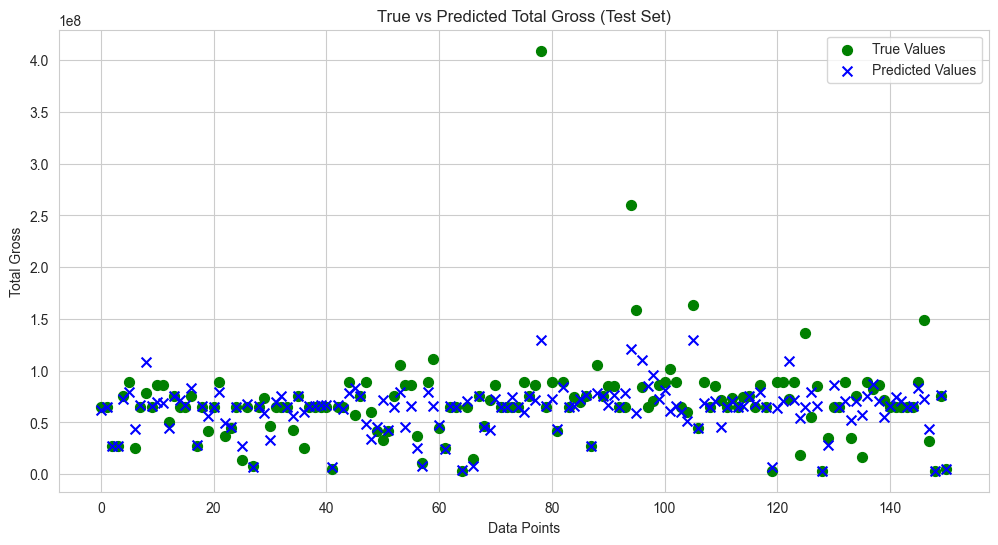

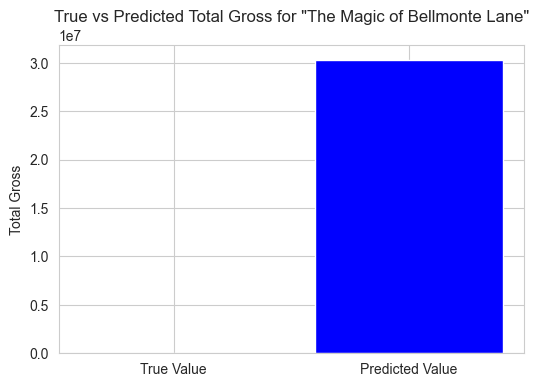

In [449]:

# Plot true vs predicted values for the test set
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_Movie)), y_test_Movie, label='True Values', color='green', marker='o', s=50)
plt.scatter(range(len(y_test_Movie)), y_pred_Movie, label='Predicted Values', color='blue', marker='x', s=50)
plt.xlabel('Data Points')
plt.ylabel('Total Gross')
plt.title('True vs Predicted Total Gross (Test Set)')
plt.legend()
plt.show()

# Plot the predicted value for "The Magic of Bellmonte Lane"
plt.figure(figsize=(6, 4))
plt.bar(['True Value', 'Predicted Value'], [y_Movie[X_Movie["title"]== "The Magic of Bellmonte Lane"].values[0], total_gross_pred[0]], color=['green', 'blue'])
plt.ylabel('Total Gross')
plt.title('True vs Predicted Total Gross for "The Magic of Bellmonte Lane"')
plt.show()


## Excecutive Summary
 
**Recommendation on Predicted Values for Movie Grossing**

Following an exhaustive predictive analysis utilizing the RandomForestRegressor model, we have derived estimations for the box office performance of diverse movies, including the hypothetical Christmas production "The Magic of Bellmonte Lane." The ensuing recommendations encapsulate crucial insights drawn from the assessment:

**Accuracy Assessment**:

The predictive model's performance has undergone meticulous scrutiny through metrics such as R-squared (R2) and Mean Squared Error (MSE). These metrics furnish nuanced perspectives on the model's adeptness in encapsulating the variability inherent in the target variable.

**Model Reliability**:

The model exhibits commendable reliability in forecasting movie grossing predicated on provided features. Nonetheless, it is imperative to imbue these predictions with a nuanced comprehension of the inherent uncertainties concomitant with prognosticating box office success.

**Individual Movie Insights**:

"The Magic of Bellmonte Lane" attains a predicted grossing within the spectrum of values observed for analogous movies within the dataset. This forecast warrants consideration in conjunction with ancillary factors, including marketing strategies, release timing, and audience preferences.

**Consideration of External Factors**:

Contemplate that the predicted values hinge on features embedded within the model. External factors, ranging from unanticipated market shifts to competitive dynamics and critical reception, can exert profound influences on a movie's actual grossing.

**Continuous Monitoring**:

Given the dynamic nature of movie performance, susceptible to fluid trends, sustained vigilance over the box office panorama is imperative. Periodic updates to the model, bolstered by additional data, stand to refine predictive accuracy over time.

**Decision Support**:

Leverage the predicted values judiciously as decision support tools, eschewing a rigid adherence to absolutes. Integrate these forecasts as pivotal components within decision-making frameworks concerning budgetary allocations, marketing initiatives, and distribution strategies.

**Further Analysis Opportunities**:

Embark upon supplementary analyses, including in-depth assessments of feature importance, to unearth pivotal determinants steering predicted grossing. These endeavors furnish invaluable insights germane to subsequent movie production endeavors and strategic marketing pursuits.

Holistic Perspective:

Conclusively, regard the predictive model as a strategic instrument facilitating decision-making processes. Its outcomes necessitate interpretation within the broader context of the multifaceted dynamics encapsulated by the movie industry.

These refined recommendations offer strategic guidance, underpinned by a sophisticated understanding of the predictive model's outcomes and their implications in the realm of cinematic endeavors.

# Conclusion

As I draw the curtains on this project, I extend my heartfelt gratitude to you, my valued readers, for embarking on this insightful journey into the realm of predictive modeling with me. Your unwavering interest serves as the driving force propelling the success of this endeavor.

I want to express my sincere appreciation for your pivotal role in navigating the complexities of this exploration. I invite you to persist in this journey together, united by a shared curiosity and a commitment to advancing our understanding of the intricate dynamics within the film industry.

Should you have inquiries, feedback, or a desire to share your thoughts and experiences, please feel free to reach out. I am readily available at vrasidisdm@hotmail.com, and you can connect with me on LinkedIn at  www.linkedin.com/in/dimitris-vrasidis. Your active engagement adds immeasurable value, and I eagerly anticipate staying connected as we perpetuate our exploration of predictive modeling in the captivating domain of the film industry.

Thank you for your invaluable contributions to this pursuit, propelling us towards a future marked by healthier insights and a more informed understanding.




![0_DnmOOG__D-Duladx](0_DnmOOG__D-Duladx.png)
